In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [118]:
model = linear_model.LinearRegression()

$f(x_1,x_2,...,x_n)=b+c_1⋅x_1+...+c_n⋅x_n$  
$b  - intercept$

In [119]:
df = pd.DataFrame({
    "max_speed": [130,150,200,280],
    "engine": [1.6,1.8,2.0,2.5],
    "age": [10,8,6,2],
    "price": [5000,8000,20000,25000],
})

In [120]:
df

,max_speed,engine,age,price
0,130,1.6,10,5000
1,150,1.8,8,8000
2,200,2.0,6,20000
3,280,2.5,2,25000


## FIT

In [121]:
model.fit(df[["max_speed","engine","age"]], df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
model.coef_

array([    300., -130000.,  -11500.])

In [123]:
model.intercept_

288999.9999999998

In [124]:
df['new']=0
for i in range(4):
    df.loc[i, 'new']=sum(df.loc[i, ["max_speed", "engine", "age"]]*model.coef_)+model.intercept_

In [125]:
df

,max_speed,engine,age,price,new
0,130,1.6,10,5000,5000.0
1,150,1.8,8,8000,8000.0
2,200,2.0,6,20000,20000.0
3,280,2.5,2,25000,25000.0


## PREDICT

$f(x)=25+10x_1+20x_2+35x_3$

In [126]:
df = pd.DataFrame({
    'x1': [10,20,30],
    'x2': [0,1,1],
    'x3': [123,210,150]
})
df['y'] = 10*df['x1'] + 20*df['x2'] + 35*df['x3'] + 25
df

,x1,x2,x3,y
0,10,0,123,4430
1,20,1,210,7595
2,30,1,150,5595


In [127]:
model.fit(df[["x1","x2","x3"]],df["y"])
print(model.coef_)
print(model.intercept_)

[10.78859836  0.67934029 35.13143306]
0.9477501616929658


In [128]:
new_apts = pd.DataFrame({
    'x1': [11,24,28,32],
    'x2': [1,0,1,1],
    'x3': [140,180,199,202]
})
new_apts

,x1,x2,x3
0,11,1,140
1,24,0,180
2,28,1,199
3,32,1,202


In [129]:
model.predict(new_apts[["x1","x2","x3"]])

array([5038.70230066, 6583.53206135, 7294.86302319, 7443.41171579])

## Feature Engineering

$f(x)=25−10x_1+20x_2+35x_3+2x_1x_3+x_3^2$

In [130]:
df = pd.DataFrame({
    "x1": [20,40,20,1,-4,5,19],
    "x2": [1,0,1,1,0,1,1],
    "x3": [200,230,210,100,130,200,230],
})
df["y"] = 25 - 10*df["x1"] + 20*df["x2"] + 35*df["x3"] + 2*df["x1"]*df["x3"] + df["x3"]**2
df

,x1,x2,x3,y
0,20,1,200,54845
1,40,0,230,78975
2,20,1,210,59695
3,1,1,100,13735
4,-4,0,130,20475
5,5,1,200,48995
6,19,1,230,69545


In [131]:
model.fit(df.drop(["y"],axis=1),df["y"])
new_apts = pd.DataFrame({
    'x1':[20],
    'x2':[1],
    'x3':[200]
})
model.predict(new_apts)

array([57186.59795647])

In [132]:
df["x1_x3"] = df["x1"] * df["x3"]
new_apts["x1_x3"] = new_apts["x1"] * new_apts["x3"]
df["super"] = df["x3"]**2
new_apts["super"] = new_apts["x3"]**2
model.fit(df.drop(["y"],axis=1),df["y"])
model.predict(new_apts)

array([54845.])

## Scatter

In [133]:
df = pd.DataFrame({
    'x': np.linspace(-20,20,50),
    'y': np.linspace(-20,20,50)**2 + 4*np.linspace(-20,20,50) + np.random.randn(50)*40
})

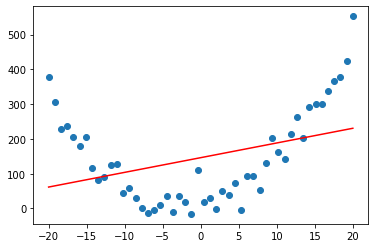

In [134]:
model.fit(df[['x']],df['y'])
plt.scatter(df['x'],df['y'])
plt.plot(df[['x']], model.predict(np.linspace(-20,20,50).reshape(50, 1)), c='r')

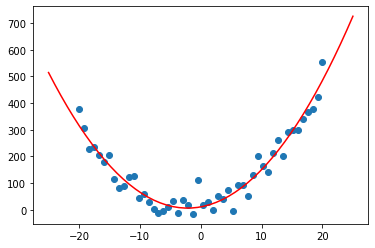

In [136]:
new_apts = pd.DataFrame({
    'x': np.linspace(-25,25,50),
})
df['x2'] = df['x']**2
new_apts['x2'] = new_apts['x']**2
model.fit(df.drop(['y'], axis=1),df['y'])
plt.scatter(df['x'], df['y'])
plt.plot(new_apts['x'], model.predict(new_apts), c='r')